In [1]:
from timeit import default_timer as timer
start = timer()

In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

2023-10-08 14:00:58.366748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-08 14:01:00.249596: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/nilray/miniconda3/envs/tf-gpu/lib/
2023-10-08 14:01:00.252457: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/nilray/miniconda3/envs/tf-gpu/lib/
2023-10-08 14:01:00.252471: W tensorflow/compi

## Data Examinaton

In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
%matplotlib inline 

print('Training data shape : ',train_X.shape, train_Y.shape)
print('Testing data shape  : ',test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape  :  (10000, 28, 28) (10000,)


In [4]:
# Find unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ',classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 1')

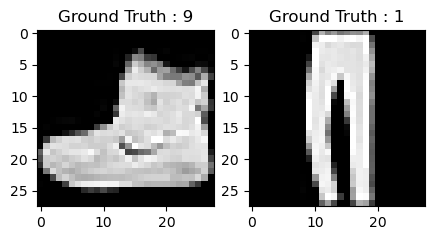

In [5]:
plt.figure(figsize=[5,5])

#Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

#Display the third image in test data
plt.subplot(122)
plt.imshow(test_X[2,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[2]))

## Data preprocessing

In [6]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# convert to float and rescale 0-255 to 0-1
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X = train_X/255.
test_X=test_X/255.


In [8]:
#change labels from categorical to one-hot encoding
train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print("Original label : ",train_Y[0])
print("After conversion to one-hot : ",train_Y_one_hot[0])

Original label :  9
After conversion to one-hot :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X,train_Y_one_hot,test_size=0.2, random_state=13)

In [10]:
train_X.shape,valid_X.shape,train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Model the data

In [11]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU


In [12]:
batch_size = 64
epochs = 20
num_classes = 10


In [13]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes,activation='softmax'))

2023-10-08 14:01:03.688120: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-08 14:01:03.747570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-08 14:01:03.747647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-08 14:01:03.749744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [16]:
fashion_train = fashion_model.fit(train_X,train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20


2023-10-08 14:01:07.552572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-10-08 14:01:09.384700: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


750/750 [==============================] - 12s 8ms/step - loss: 0.4612 - accuracy: 0.8335 - val_loss: 0.3223 - val_accuracy: 0.8822
Epoch 2/20
750/750 [==============================] - 6s 8ms/step - loss: 0.2841 - accuracy: 0.8951 - val_loss: 0.2790 - val_accuracy: 0.8978
Epoch 3/20
750/750 [==============================] - 6s 8ms/step - loss: 0.2371 - accuracy: 0.9126 - val_loss: 0.2679 - val_accuracy: 0.9063
Epoch 4/20
750/750 [==============================] - 6s 8ms/step - loss: 0.2054 - accuracy: 0.9248 - val_loss: 0.2455 - val_accuracy: 0.9112
Epoch 5/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1826 - accuracy: 0.9321 - val_loss: 0.2339 - val_accuracy: 0.9171
Epoch 6/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1581 - accuracy: 0.9415 - val_loss: 0.2337 - val_accuracy: 0.9177
Epoch 7/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1376 - accuracy: 0.9493 - val_loss: 0.2913 - val_accuracy: 0.9038
Epoch 8/20
750/7

In [17]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot,verbose=0)

In [18]:
print("Test loss = ",test_eval[0])
print("Test accuracy = ",test_eval[1])

Test loss =  0.5033403038978577
Test accuracy =  0.9200000166893005


<Figure size 640x480 with 0 Axes>

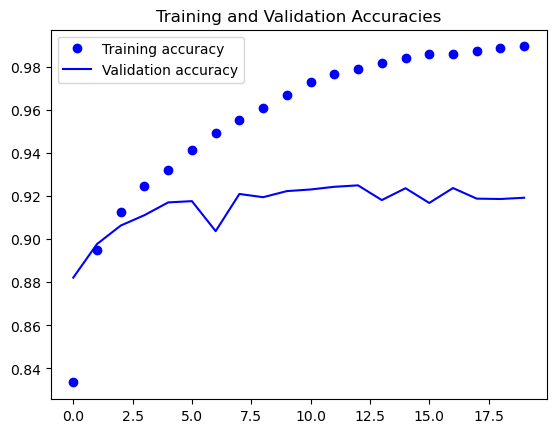

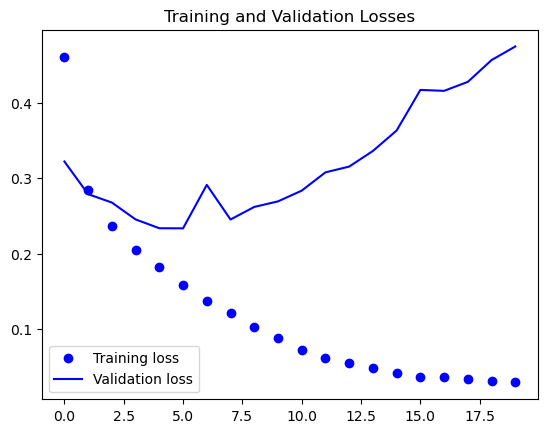

<Figure size 640x480 with 0 Axes>

In [19]:
#Visualize results
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.figure()

## Create model with dropout

In [20]:
batch_size = 64
epochs = 20
num_classes = 10

In [21]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
#dropout
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#dropout
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#dropout
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
#dropout
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes,activation='softmax'))

In [22]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [23]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [24]:
fashion_train_dropout = fashion_model.fit(train_X,train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
  5/750 [..............................] - ETA: 20s - loss: 2.2440 - accuracy: 0.1531

2023-10-08 14:03:15.666455: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


750/750 [==============================] - 8s 10ms/step - loss: 0.6018 - accuracy: 0.7766 - val_loss: 0.3745 - val_accuracy: 0.8578
Epoch 2/20
750/750 [==============================] - 7s 10ms/step - loss: 0.3786 - accuracy: 0.8614 - val_loss: 0.3083 - val_accuracy: 0.8843
Epoch 3/20
750/750 [==============================] - 7s 10ms/step - loss: 0.3306 - accuracy: 0.8764 - val_loss: 0.2878 - val_accuracy: 0.8940
Epoch 4/20
750/750 [==============================] - 7s 10ms/step - loss: 0.3020 - accuracy: 0.8870 - val_loss: 0.2584 - val_accuracy: 0.9056
Epoch 5/20
750/750 [==============================] - 7s 10ms/step - loss: 0.2820 - accuracy: 0.8950 - val_loss: 0.2487 - val_accuracy: 0.9097
Epoch 6/20
750/750 [==============================] - 7s 10ms/step - loss: 0.2697 - accuracy: 0.8988 - val_loss: 0.2401 - val_accuracy: 0.9103
Epoch 7/20
750/750 [==============================] - 7s 10ms/step - loss: 0.2573 - accuracy: 0.9038 - val_loss: 0.2544 - val_accuracy: 0.9050
Epoch 8/20

In [25]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [26]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot,verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.2211 - accuracy: 0.9209


In [27]:
print("Test loss = ",test_eval[0])
print("Test accuracy = ",test_eval[1])

Test loss =  0.22108608484268188
Test accuracy =  0.9208999872207642


<Figure size 640x480 with 0 Axes>

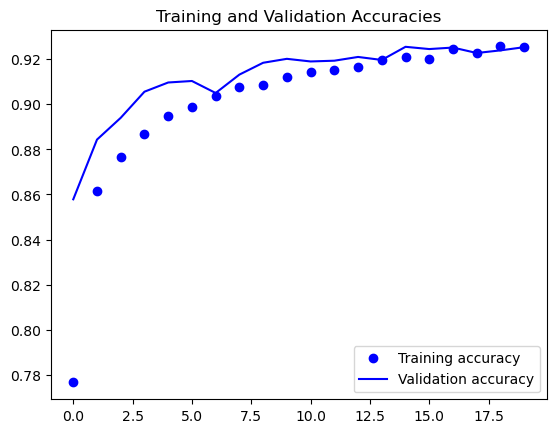

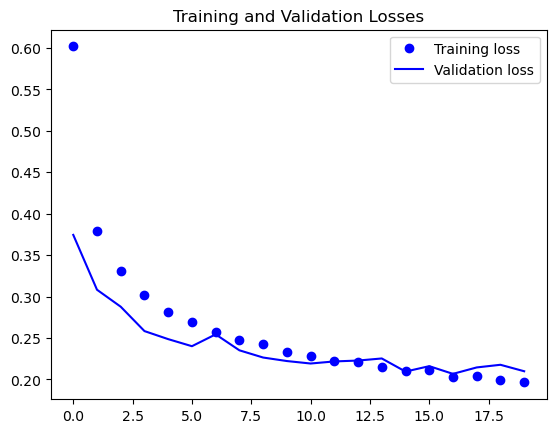

<Figure size 640x480 with 0 Axes>

In [28]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.figure()

In [29]:
predicted_classes = fashion_model.predict(test_X)

313/313 [==============================] - 1s 3ms/step


In [30]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [31]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9164 correct labels


/tmp/ipykernel_26990/4241853884.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_26990/4241853884.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


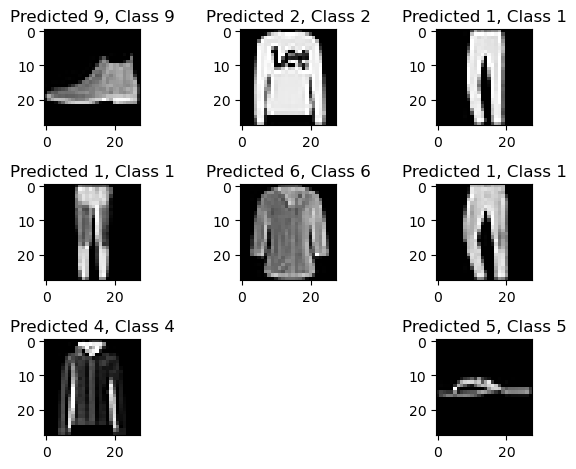

In [32]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" %len(correct))
for i,correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct],test_Y[correct]))
    plt.tight_layout()

Found 836 incorrect labels


/tmp/ipykernel_26990/3887955676.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_26990/3887955676.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


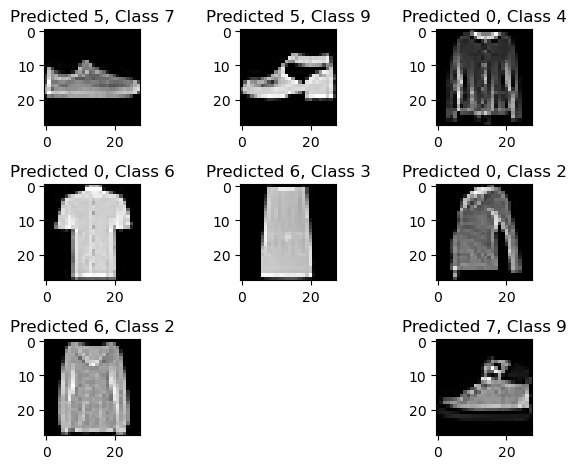

In [33]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" %len(incorrect))
for i,incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],test_Y[incorrect]))
    plt.tight_layout()

In [34]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y,predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.89      0.83      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.86      0.89      0.87      1000
     Class 3       0.93      0.90      0.92      1000
     Class 4       0.88      0.86      0.87      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.81      0.72      0.77      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [35]:
end = timer()
print("--- %s seconds ---" % (end-start))

--- 292.96472117899975 seconds ---
